<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumToyAlgorithm_superdense_coding_01_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superdense Coding

This notebook demonstrates the Superdense Coding (SDC) protocol. We first use Qiskit's simulator to test our quantum circuit, and then try it out on a real quantum computer.

## Contents

1. [Superdense Coding and Quantum Teleportation](#difference)
2. [The Process](#process)    
    2.1 [Step 1](#step1)    
    2.2 [Step 2](#step2)    
    2.3 [Step 3](#step3)
3. [Simulating the Superdense Coding Protocol](#simulating)    
    3.1 [3.1 Visualizing Our Measurements](#visualising)    
4. [Superdense Coding on a Real Quantum Computer](#real_qc)


## 1. The Difference between Superdense Coding and Quantum Teleportation <a id='difference'></a>

Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.

Quantum teleportation is a process by which the state of qubit ($|\psi\rangle$) can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.

| Teleportation                                     | Superdense Coding                                    |
|:-------------------------------------------------:|:----------------------------------------------------:|
| Transmit one<br>qubit using two<br>classical bits | Transmit two<br>classical bits<br>using one<br>qubit |


The teleportation protocol can be thought of as a flipped version of the superdense coding protocol, in the sense that Alice and Bob merely “swap their equipment.”



## 2. The Process <a id='process'></a>

![image1](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/images/superdense.jpg?raw=1)

### 2.1 Step 1 <a id='step1'></a>
The process starts with a third party, who we'll call Charlie. Two qubits are prepared by Charlie in an entangled state. He initially starts the 2 qubits in the basis state $|0\rangle$. He applies Hadamard gate ($H$) to the first qubit to create superposition. He then applies CNOT gate ($CX$) using the first qubit as a control and the second as the target. This is the entangled state (Bell pair) we mentioned earlier.

#### Outcome States

We start in the state:

$$|00\rangle = |0\rangle_A\otimes |0\rangle_B$$

where the qubit to be sent to Alice is labeled with $A$ and the qubit to be sent to Bob is labeled $B$. Charlie first applies a Hadamard gate to the first qubit, which creates superposition and we get the state:


$$|+0\rangle  =  \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$



Then Charlie applies the CNOT gate. The CNOT gate entangles both qubits, i.e. it flips the target if the control is $|1\rangle$. Note that the control qubit is our leftmost qubit.



$$\text{CNOT} \tfrac{1}{\sqrt{2}}(|00\rangle + |10\rangle) = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$



### 2.2 Step 2 <a id='step2'></a>

Charlie sends the first qubit to Alice and the second qubit to Bob. The goal of the protocol is for Alice to send 2 classical bits of information to Bob using her qubit. But before she does, she needs to apply a set of quantum gates to her qubit depending on the 2 bits of information she wants to send:


#### Encoding Rules for Superdense Coding (Alice protocol):
<table>
    <tr>
        <th>Intended Message</th>
        <th>Applied Gate</th>
        <th>Resulting State ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
    </tr>
    <tr>
        <td>00</td>
        <td>$I$</td>
        <td>$|00\rangle + |11\rangle$</td>
    </tr>
    <tr>
        <td>01</td>
        <td>$X$</td>
        <td>$|10\rangle + |01\rangle$</td>
    </tr>
    <tr>
        <td>10</td>
        <td>$Z$</td>
        <td>$|00\rangle - |11\rangle$</td>
    </tr>
    <tr>
        <td>11</td>
        <td>$ZX$</td>
        <td>$-|10\rangle + |01\rangle$</td>
    </tr>
</table>

Thus if she wants to send a `00`, she does nothing to her qubit (apply the identity ($I$) gate). If she wants to send a `01`, then she applies the $X$ gate. Depending on what she wants to send, she applies the appropriate gate, then sends her qubit to Bob for the final step in the process.


### 2.3 Step 3 <a id='step3'></a>

Bob receives Alice's qubit (leftmost qubit) and uses his qubit to decode Alice's message. Notice that he does not need to have knowledge of the state in order to decode it — he simply uses the restoration operation.

Bob applies a CNOT gate using the leftmost qubit as control and the rightmost as target. Then he applies a Hadamard gate and finally performs a measurement on both qubits to extract Alice's message.

<table>
    <tr>
        <th>Bob Receives ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After CNOT-gate ($\cdot\tfrac{1}{\sqrt{2}}$)</th>
        <th>After H-gate</th>
    </tr>
    <tr>
        <td>$|00\rangle + |11\rangle$</td>
        <td>$|00\rangle + |10\rangle$</td>
        <td>$|00\rangle$</td>
    </tr>
    <tr>
        <td>$|10\rangle + |01\rangle$</td>
        <td>$|11\rangle + |01\rangle$</td>
        <td>$|01\rangle$</td>
    </tr>
    <tr>
        <td>$|00\rangle - |11\rangle$</td>
        <td>$|00\rangle - |10\rangle$</td>
        <td>$|10\rangle$</td>
    </tr>
    <tr>
        <td>$-|10\rangle + |01\rangle$</td>
        <td>$-|11\rangle + |01\rangle$</td>
        <td>$|11\rangle$</td>
    </tr>
</table>

## 3. Simulating the Superdense Coding Protocol <a id='simulating'></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=67d951a082fe6d43f16915f665755ffd2daafad0d0367374c8c552f3e8cc1ed7
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 50.6 MB/s eta 0:00:00
  Cloning https://github.com/qis

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

In [22]:
# 메시지 (2 classical bits): 예를 들어 10
message = '11'  # 바꿔서 실험 가능: '00', '01', '10', '11'

# 1. 양자 회로 생성 (2 큐비트: Alice[0], Bob[1])
qc = QuantumCircuit(2, 2)

# 2. 얽힘 생성 (Bell state)
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# 3. Alice의 인코딩
# (Alice는 자신의 큐비트 0번에만 연산함)
if message == '00':
    pass  # 아무 것도 하지 않음
elif message == '01':
    qc.z(0)
elif message == '10':
    qc.x(0)
elif message == '11':
    qc.x(0)
    qc.z(0)
###if
qc.barrier()

# 4. Bob의 디코딩 (얽힘 해제)
qc.cx(0, 1)
qc.h(0)
qc.barrier()
# 5. 측정
qc.measure(0, 0)  # Alice 큐비트
qc.measure(1, 1)  # Bob 큐비트


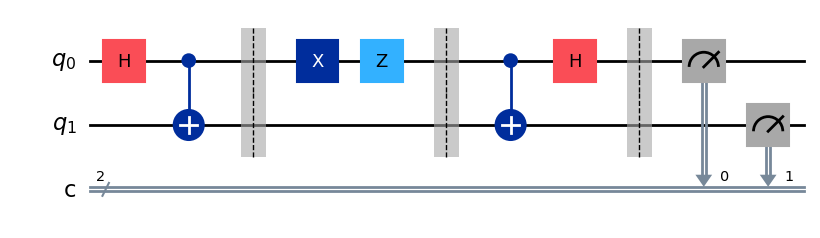

In [23]:
qc.draw('mpl')

In [24]:
# 6. 실행
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

메시지 11 → 측정 결과: {'11': 1024}


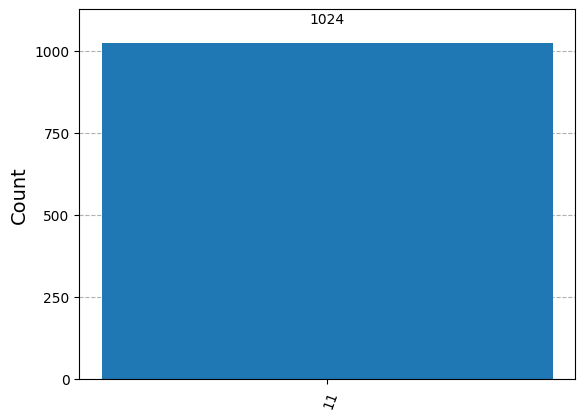

In [25]:
# 7. 출력
print(f"메시지 {message} → 측정 결과: {counts}")
plot_histogram(counts)